Разведочный анализ данных в задаче об оценках студентов.
Будем работать с данными, в которых представлены оценки студентов за экзамены по математике, чтению и письму, а также различные характеристики студентов.

Цели
1. Понять, как различные факторы (экономические, социальные, личные) влияют на оценки студентов на экзаменах.
2. Познакомиться с библиотекой seaborn.
Источник
https://www.kaggle.com/datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passmark = 40

In [3]:
#your code here
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#your code here
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [7]:
#your code here
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Посмотрим на распределение оценок по математике (Math), чтению (Reading) и письму (Writing).

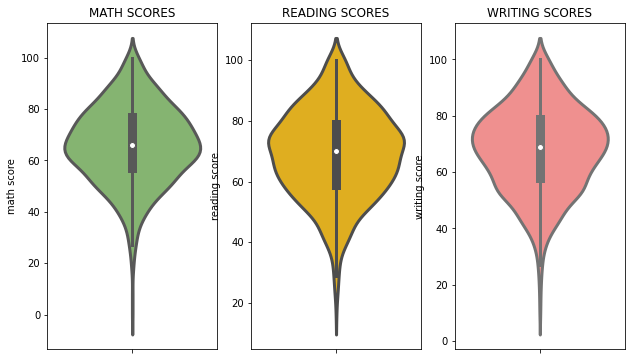

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,palette='spring',linewidth=3)
plt.show()


Из графиков видно, что большинство студентов набрали 60-80 по математике и 50-80 по чтению и письму.

Постройте график (гистограмму, любую нравящуюся вам визуализацию) зависимости оценок по математике (math score) от test preparation course и от gender. То же самое - для оценок за reading и writing.

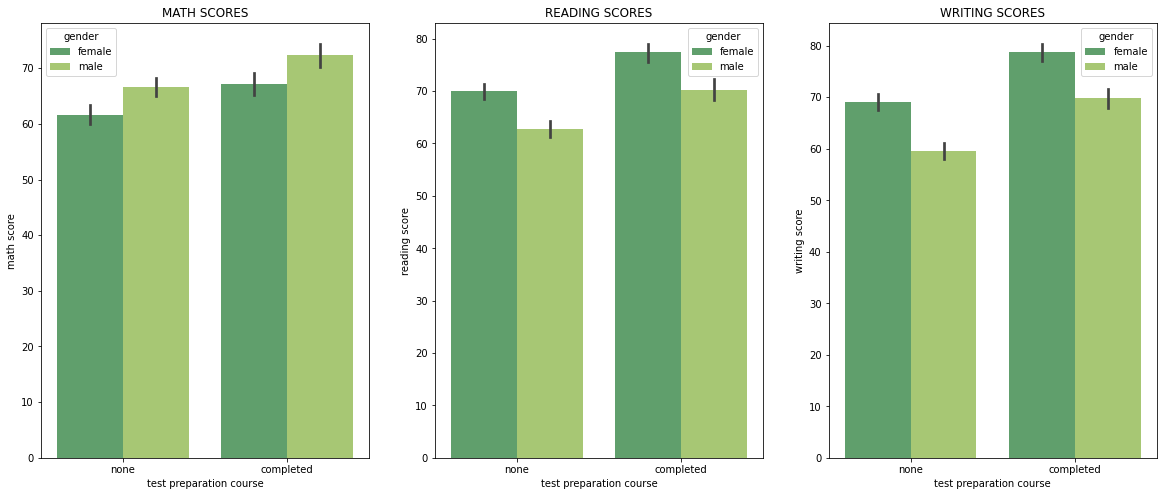

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',\
           palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',\
           palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',\
           palette='summer')
plt.title('WRITING SCORES')
plt.show()


Какие выводы можно сделать из этих графиков?

Следующая функция (pairplot) - это визуализация, которая помогает понять, как связаны между собой все пары признаков.

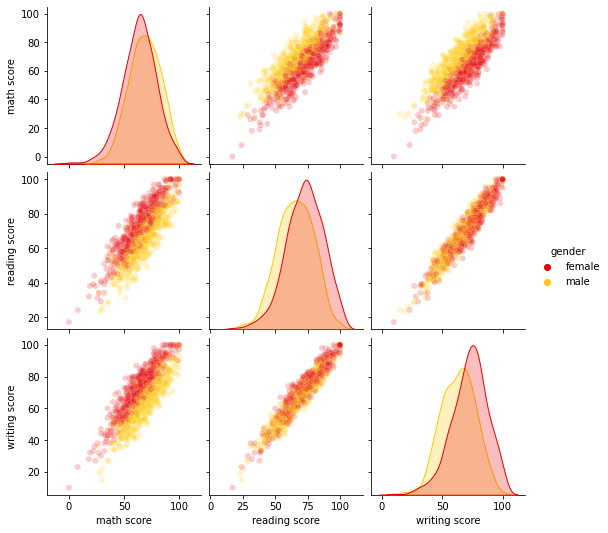

In [10]:
sns.pairplot(data=df,hue='gender',plot_kws={'alpha':0.2},palette='hot')

Как влияет lunch на оценки?

Выведите на экран все различные значения из столбца lunch

In [11]:
#your code here
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

Постройте barplot, отражающий зависимость оценок по math от test preparation course; сделайте разделение по 'lunch'. То же самое - для reading и writing.

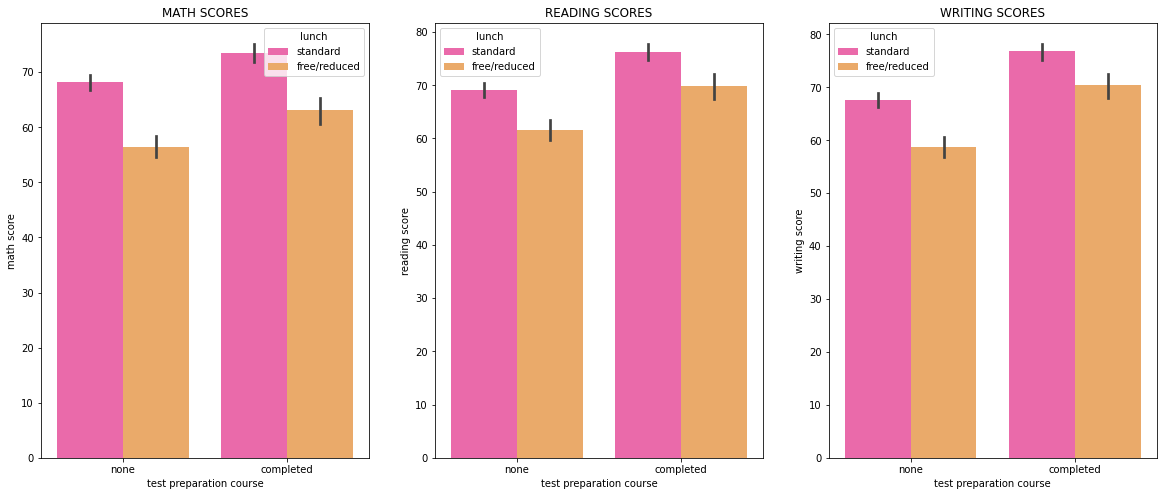

In [12]:
#your code here
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='lunch',\
           palette='spring')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='lunch',\
           palette='spring')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='lunch',\
           palette='spring')
plt.title('WRITING SCORES')
plt.show()

Как зависят баллы от типа lunch?

Постройте гистограмму (plt.hist или sns.distplot) распределения оценок студентов по математике.

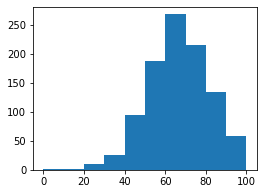

C:\Users\catre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


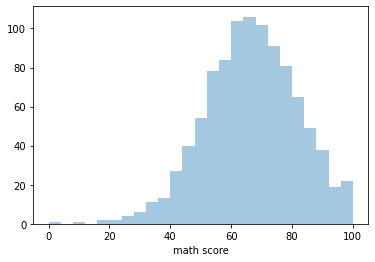

In [13]:
#your code here
plt.figure(figsize=(4,3))
plt.hist(df['math score']) #bins
plt.show()

sns.distplot(df['math score'], kde=False) #bins
plt.show()

Создайте новый столбец в таблице df под названием Math_PassStatus и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

In [14]:
#your code here
df['Math_PassStatus'] = np.where(df['math score'] < passmark, 'F', 'P')

#ИЛИ

df['Math_PassStatus'] = df['math score'].apply(lambda x: 'F' if x < passmark else 'P')

In [18]:
df.Math_PassStatus

0      P
1      P
2      P
3      P
4      P
      ..
995    P
996    P
997    P
998    P
999    P
Name: Math_PassStatus, Length: 1000, dtype: object

Как зависит успех сдачи экзамена от уровня образования?

Постройте гистограмму (countplot) распределения студентов по уровням образования

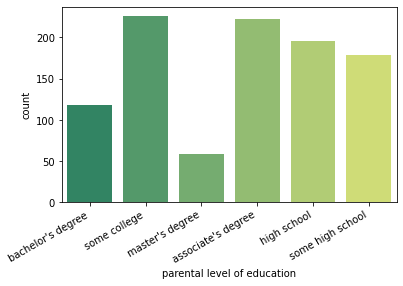

In [15]:

#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, palette='summer')
fig.autofmt_xdate()

Создайте countplot, отображающий зависимость Math_PassStatus от parental level of education

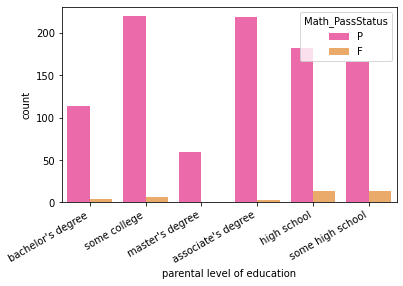

In [16]:
#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Math_PassStatus', palette='spring')
fig.autofmt_xdate()

По аналогии с колонкой Math_PassStatus создайте колонки Reading_PassStatus и Writing_PassStatus.

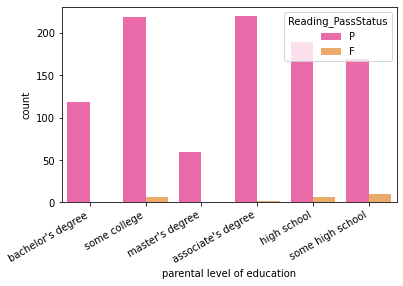

In [17]:
#your code here#your code here
df['Reading_PassStatus'] = np.where(df['reading score'] < passmark, 'F', 'P')

fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Reading_PassStatus', palette='spring')
fig.autofmt_xdate()

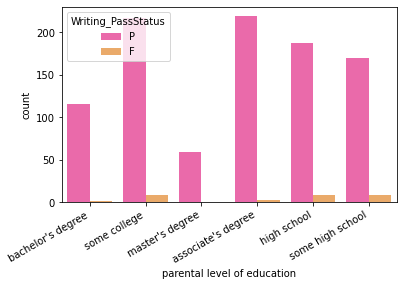

In [18]:

#your code here#your code here
df['Writing_PassStatus'] = np.where(df['writing score'] < passmark, 'F', 'P')

fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Writing_PassStatus', palette='spring')
fig.autofmt_xdate()

Сколько студентов успешно сдали все экзамены?
Создайте столбец OverAll_PassStatus и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [19]:
#your code here
df['OverAll_PassStatus'] = df.apply(lambda x: 'F' if x['Math_PassStatus'] == 'F' or x['Reading_PassStatus'] == 'F'  
                                                  or x['Writing_PassStatus'] == 'F' else 'P', axis=1)
df['OverAll_PassStatus'].value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

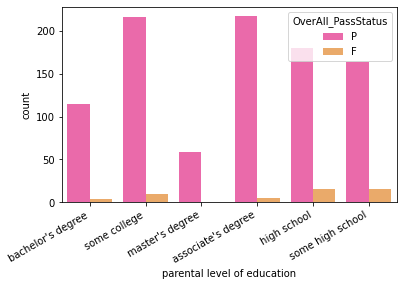

In [20]:
#your code here
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='OverAll_PassStatus', palette='spring')
fig.autofmt_xdate()

Построим модель, которая по полу (gender) и ланчу (lunch) предсказывает, сдал студент все экзамены или нет (OverAll_PassStatus).

In [21]:
df['gender_num'] = df['gender'].apply(lambda x: 0 if x == 'male' else 1)
df['lunch_num'] = df['lunch'].apply(lambda x: 0 if x == 'standard' else 1)
df['target'] = df['OverAll_PassStatus'].apply(lambda x: 1 if x == 'P' else 0)

X = df[['gender_num','lunch_num']] #матрица объект-признак
y = df['target'] #целевая переменная

In [27]:
!pip3 install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=00acd5ad2fa0552640c9b9d6f50d0866f75a147b09ecdee2b01e0d853f3f47a0
  Stored in directory: c:\users\catre\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((700, 2), (700,), (300, 2), (300,))

In [30]:
from sklearn.linear_model import LogisticRegression #это классификатор!

model = LogisticRegression() #классификатор для решения нашей задачи
model.fit(X_train, y_train) #обучаем модель на трейне

prediction = model.predict(X_test) #делаем предсказание на тестовых данных

In [31]:

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prediction))

0.9566666666666667


In [32]:
prediction_train = model.predict(X_train) #делаем предсказание на тренировочных данных
print(accuracy_score(y_train, prediction_train))

0.9457142857142857


Построим модель, которая по полу (gender) и ланчу (lunch) предсказывает балл студента по математике (math score).

In [33]:
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:

from sklearn.linear_model import LinearRegression

#your code here
model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [35]:
prediction[:5]

array([56.55315791, 68.12610754, 61.65816012, 68.12610754, 73.23110975])

In [36]:
y_test[:5]

842    23
799    52
603    60
475    71
559    73
Name: math score, dtype: int64

In [37]:
from sklearn.metrics import mean_squared_error

#your code here
mean_squared_error(y_test, prediction)

206.6643695028051

In [38]:
prediction_train = model.predict(X_train)

mean_squared_error(y_train, prediction_train)

191.04884836752998

# Task 1


Найдем распределение средней оценки за все экзамены:
Создайте столбец Total_Marks и запишите в него суммарный балл каждого студента за все дисциплины.

Создайте столбец Percentage, в который запишите средний балл студента за все дисциплины.

Нарисуйте гистограмму распределения среднего балла.

In [42]:
df['Total_Marks'] = df['math score'] + df['writing score'] + df['reading score']
df['Percentage'] = df['Total_Marks'] / 3

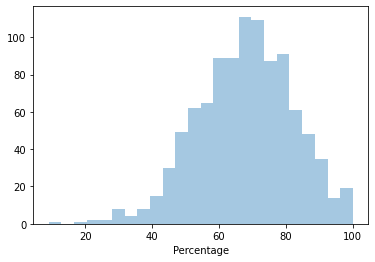

In [45]:
# Гистограмма распределения среднего балла
sns.distplot(df['Percentage'], kde=False) 
plt.show()

Выведем список студентов, получивших макимальную оценку на экзамене.

In [65]:
df[df['Total_Marks'] == 300]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,gender_num,lunch_num,target,Total_Marks,Percentage
458,female,group E,bachelor's degree,standard,none,100,100,100,P,P,P,P,1,0,1,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,P,P,P,P,0,0,1,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,P,P,P,P,1,0,1,300,100.0



Постройте график, отображающий зависимость итогового балла (Total_Marks) от уровня образования (parental level of education).

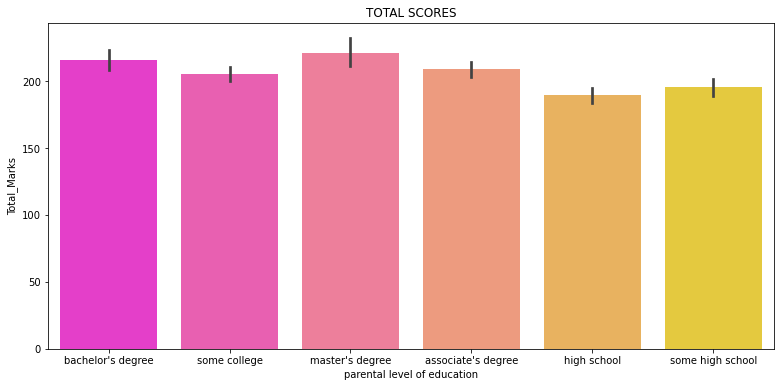

In [98]:
plt.figure(figsize=(13,6))
sns.barplot(x='parental level of education',y='Total_Marks',data=df, palette='spring')
plt.title('TOTAL SCORES')
plt.show()

Переведем баллы в оценки
Система перевода баллов в оценки
больше 80 = A
70-80 = B
60-70 = C
50-60 = D
40-50 = E
меньше 40 = F (Fail)
Создайте вспомогательную функцию, которая будет по среднему баллу выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок.

In [84]:
def GetGrade(Percentage):
    if Percentage > 80:
        return 'A'
    elif 80>= Percentage >= 70:
        return 'B'
    elif 70> Percentage >= 60:
        return 'C'
    elif 60> Percentage >= 50:
        return 'D'
    elif 50> Percentage >= 40:
        return 'E'
    else:
        return 'F'

df['Grade'] = df['Percentage'].apply(GetGrade)
df['Grade'].value_counts()

B    265
C    256
A    194
D    182
E     73
F     30
Name: Grade, dtype: int64

Нарисуем распределение полученных оценок


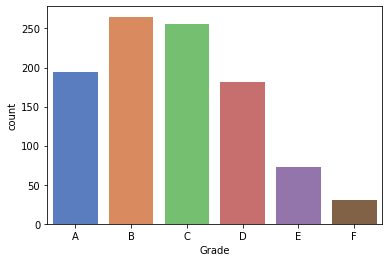

In [99]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

Нарисуйте гистограмму распределения оценок в зависимости от уровня образования.

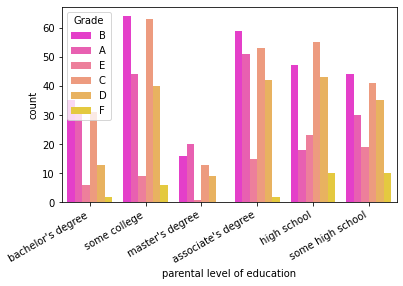

In [88]:
fig, ax = plt.subplots()
sns.countplot(x='parental level of education', data=df, hue='Grade', palette='spring')
fig.autofmt_xdate()


Посмотрим на лучших студентов (которые получили больше 90 баллов за каждый экзамен).

In [89]:
df[(df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score']>90)]\
.sort_values(by=['Total_Marks'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,gender_num,lunch_num,target,Total_Marks,Percentage,Grade
962,female,group E,associate's degree,standard,none,100,100,100,P,P,P,P,1,0,1,300,100.000000,A
458,female,group E,bachelor's degree,standard,none,100,100,100,P,P,P,P,1,0,1,300,100.000000,A
916,male,group E,bachelor's degree,standard,completed,100,100,100,P,P,P,P,0,0,1,300,100.000000,A
114,female,group E,bachelor's degree,standard,completed,99,100,100,P,P,P,P,1,0,1,299,99.666667,A
179,female,group D,some high school,standard,completed,97,100,100,P,P,P,P,1,0,1,297,99.000000,A
712,female,group D,some college,standard,none,98,100,99,P,P,P,P,1,0,1,297,99.000000,A
625,male,group D,some college,standard,completed,100,97,99,P,P,P,P,0,0,1,296,98.666667,A
165,female,group C,bachelor's degree,standard,completed,96,100,100,P,P,P,P,1,0,1,296,98.666667,A
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100,P,P,P,P,1,1,1,293,97.666667,A
149,male,group E,associate's degree,free/reduced,completed,100,100,93,P,P,P,P,0,1,1,293,97.666667,A



Посмотрим на распределение оценок в зависимости от пола для каждой этнической группы

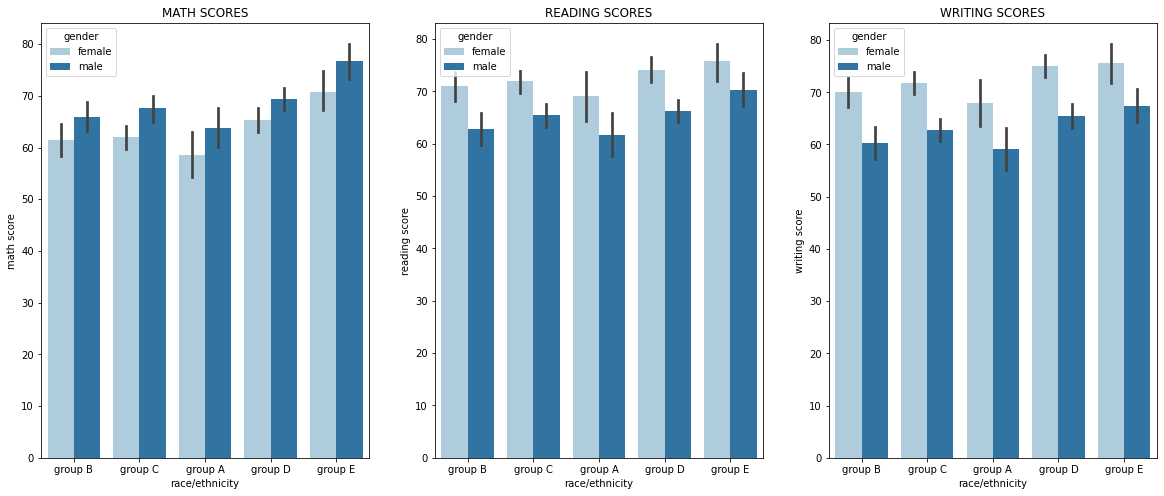

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=df,hue='gender',palette='Paired')
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=df,hue='gender',palette='Paired')
plt.show()

Сделайте выводы: от какого фактора больше всего зависят оценки студента? от какого фактора они зависят меньше всего? какие зависимости между признаками кажутся вам наиболее значимыми?

Можем заметить, что наблюдается зависимость оценки от пола: так, девушки получают выше баллы по "Reading" и "Writing", в то время как юноши получают выше баллы по "Math". Эта зависимость сохраняется и внутри этнических групп.
Наблюдается зависимость между принадлежности к этнической группе и баллами студентов: заметнее всего это на оценках по "math". Кроме того, студенты group A имеют самые низкие оценки по всем предметам, относительно других групп.

Из гистограммы распределения оценок в зависимости от уровня образования можно сделать вывод, что больше всего оценок "A" у студентов с образованием "associate's degree". Итоговый балл ниже всего у студентов с образованием "high school".

Всего 3% студентов не сдали экзамены.

Наблюдается сильная зависимость между оценками студента и наличием "lunch". Возможно, это говорит об уровне дохода семьи и позволяет дополнительно заниматься с репетиторами.

In [103]:
df['Grade'].value_counts(normalize = True)*100

B    26.5
C    25.6
A    19.4
D    18.2
E     7.3
F     3.0
Name: Grade, dtype: float64